# Import Packages

In [60]:
import numpy as np
import pandas as pd
from copy import deepcopy
import gurobipy as gp
from gurobipy import GRB
import os

In [28]:
def generate_random_instance(instance_num, max_plants=5, max_products=20, max_periods=10):
    # Randomly determine the number of plants, products, and periods
    num_plants = np.random.randint(2, max_plants + 1)
    num_products = np.random.randint(5, max_products + 1)
    num_periods = np.random.randint(3, max_periods + 1)

    print(f"Generating instance: {num_products} products, {num_plants} plants, {num_periods} periods")

    # Initialize a new blank DataFrame
    new_instance = pd.DataFrame()

    # Place the counts in their fixed positions
    new_instance.loc[0, 0] = "Plants"
    new_instance.loc[0, 1] = num_plants
    new_instance.loc[1, 0] = "Periods"
    new_instance.loc[1, 1] = num_periods
    new_instance.loc[2, 0] = "Products"
    new_instance.loc[2, 1] = num_products

    # Dynamically calculate offsets
    row_offset = 3  # Start below the counts

    def add_empty_row():
        """Add an explicit empty row to the DataFrame."""
        nonlocal row_offset
        new_instance.loc[row_offset, :] = ""
        row_offset += 1

    def add_column_numbers(num_cols):
        """Add a row with column numbers starting from 1."""
        nonlocal row_offset
        for col in range(1, num_cols + 1):
            new_instance.loc[row_offset, 2 + col - 1] = col
        row_offset += 1

    add_empty_row()
    # Add Setup Costs
    new_instance.loc[row_offset, 0] = "Setup Cost"
    add_column_numbers(num_plants)
    row_offset += 1
    for i in range(num_products):
        new_instance.loc[row_offset + i, 1] = f"{i + 1}"
        for j in range(num_plants):
            new_instance.loc[row_offset + i, 2 + j] = np.random.randint(10, 500)
    row_offset += num_products
    add_empty_row()

    # Add Inventory Costs
    new_instance.loc[row_offset, 0] = "Inventory Cost"
    add_column_numbers(1)
    row_offset += 1
    for i in range(num_products):
        new_instance.loc[row_offset + i, 1] = f"{i + 1}"
        new_instance.loc[row_offset + i, 2] = np.random.randint(1, 50)
    row_offset += num_products
    add_empty_row()

    # Add Transfer Costs
    new_instance.loc[row_offset, 0] = "Transfer Cost"
    add_column_numbers(num_plants)
    row_offset += 1
    for i in range(num_plants):
        new_instance.loc[row_offset + i, 1] = f"{i + 1}"
        for j in range(num_plants):
            new_instance.loc[row_offset + i, 2 + j] = np.random.randint(1, 50)
    row_offset += num_plants
    add_empty_row()

    # Add Production Costs
    new_instance.loc[row_offset, 0] = "Production Cost"
    add_column_numbers(num_plants)
    row_offset += 1
    for i in range(num_products):
        new_instance.loc[row_offset + i, 1] = f"{i + 1}"
        for j in range(num_plants):
            new_instance.loc[row_offset + i, 2 + j] = np.random.randint(5, 100)
    row_offset += num_products
    add_empty_row()

    # Add Processing Times
    new_instance.loc[row_offset, 0] = "Processing Times"
    add_column_numbers(num_plants)
    row_offset += 1
    for i in range(num_products):
        new_instance.loc[row_offset + i, 1] = f"{i + 1}"
        for j in range(num_plants):
            new_instance.loc[row_offset + i, 2 + j] = np.random.randint(1, 7)
    row_offset += num_products
    add_empty_row()

    # Add Setup Times
    new_instance.loc[row_offset, 0] = "Setup Times"
    add_column_numbers(num_plants)
    row_offset += 1
    for i in range(num_products):
        new_instance.loc[row_offset + i, 1] = f"{i + 1}"
        for j in range(num_plants):
            new_instance.loc[row_offset + i, 2 + j] = np.random.randint(10, 70)
    row_offset += num_products
    add_empty_row()

    # Add Demand Values
    new_instance.loc[row_offset, 0] = "Demand"
    for p in range(num_periods):
        new_instance.loc[row_offset, 1] = f"Period {p + 1}"
        row_offset += 1
        add_column_numbers(num_plants)
        for i in range(num_products):
            new_instance.loc[row_offset + i, 1] = f"{i + 1}"
            for j in range(num_plants):
                new_instance.loc[row_offset + i, 2 + j] = np.random.randint(40, 250)
        row_offset += num_products
    add_empty_row()

    # Add Capacity
    new_instance.loc[row_offset, 0] = "Capacity"
    add_column_numbers(num_plants)
    row_offset += 1
    for p in range(num_periods):
        new_instance.loc[row_offset + p, 1] = f"{p + 1}"
        for j in range(num_plants):
            new_instance.loc[row_offset + p, 2 + j] = np.random.randint(3500, 6500)
    row_offset += num_periods

    # Save the new instance to an Excel file in the current working directory
    current_directory = os.getcwd()
    new_file_path = os.path.join(current_directory, f"Instancia_MPCLSP_{instance_num}.xlsx")
    new_instance.to_excel(new_file_path, index=False, sheet_name='Instancia', header=False)
    return new_file_path

In [31]:
# Generate the first new instance and save it
new_instance_path = generate_random_instance(1)
new_instance_path

Generating instance: 10 products, 5 plants, 5 periods


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_14508\1384369106.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_instance.loc[row_offset, :] = ""
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_14508\1384369106.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_instance.loc[row_offset, :] = ""
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_14508\1384369106.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_instance.loc[row_offset, :] = ""
C:\Users\Rodr

'c:\\Users\\Rodrigo\\Desktop\\5A1S\\PGO\\Work Group\\2. MPCLSP\\Instancia_MPCLSP_1.xlsx'

# Import the Data

In [61]:
# Load data from Excel
file_path = 'Instancia_MPCLSP.xlsx'
#file_path = '/content/drive/My Drive/PGO_MPCLSP/script_download/Instancia_MPCLSP.xlsx'
instancia_df = pd.read_excel(file_path, sheet_name='Instancia', header=None)

# Define a function to find the value next to a specific label
def get_value_by_label(df, label):
    row = df[df.iloc[:, 0] == label].index
    if len(row) > 0:
        return int(df.iloc[row[0], 1]) if pd.notna(df.iloc[row[0], 1]) else None
    return None

# Extract and validate the number of plants, periods, and products
num_plants = get_value_by_label(instancia_df, "Plants")
num_periods = get_value_by_label(instancia_df, "Periods")
num_products = get_value_by_label(instancia_df, "Products")

# Extract setup costs (s_ij)
setup_cost_start = instancia_df[instancia_df.iloc[:, 0] == "Setup Cost"].index[0] + 1
setup_costs = instancia_df.iloc[setup_cost_start:setup_cost_start + num_products, 2:2 + num_plants].to_numpy()

# Extract Inventory Costs as a 1D array (one cost per product)
inventory_cost_start = instancia_df[instancia_df.iloc[:, 0] == "Inventory Cost"].index[0] + 1
inventory_costs = instancia_df.iloc[inventory_cost_start:inventory_cost_start + num_products, 2].to_numpy()

# Extract production costs (c_ij)
production_cost_start = instancia_df[instancia_df.iloc[:, 0] == "Production Cost"].index[0] + 1
production_costs = instancia_df.iloc[production_cost_start:production_cost_start + num_products, 2:2 + num_plants].to_numpy()

# Extract transportation costs (t_jj')
transport_cost_start = instancia_df[instancia_df.iloc[:, 0] == "Transfer Cost"].index[0] + 1
transfer_costs = instancia_df.iloc[transport_cost_start:transport_cost_start + num_plants, 2:2 + num_plants].to_numpy()

# Extract demand (d_ijp)
demand_start = instancia_df[instancia_df.iloc[:, 0] == "Demand"].index[0] + 2
demand_data = []

# Extract setup times (gama_ij)
setup_times_start = instancia_df[instancia_df.iloc[:, 0] == "Setup Times"].index[0] + 1
setup_times = instancia_df.iloc[setup_times_start:setup_times_start + num_products, 2:2 + num_plants].to_numpy()

# Extract processing times (p_ij)
processing_times_start = instancia_df[instancia_df.iloc[:, 0] == "Processing Times"].index[0] + 1
processing_times = instancia_df.iloc[processing_times_start:processing_times_start + num_products, 2:2 + num_plants].to_numpy()

# Extract demand data by looping over each period and skipping rows after each set
for p in range(num_periods):
    period_data = instancia_df.iloc[demand_start + p * (num_products + 2):demand_start + p * (num_products + 2) + num_products, 2:2 + num_plants].to_numpy()
    demand_data.append(period_data)

# Convert demand_data to a numpy array with dimensions (num_products, num_plants, num_periods)
demand = np.array(demand_data).transpose(1, 2, 0)
# Extract capacity (k_jp)
capacity_start = instancia_df[instancia_df.iloc[:, 0] == "Capacity"].index[0] + 1
capacity = instancia_df.iloc[capacity_start:capacity_start + num_periods, 2:2 + num_plants].to_numpy()
capacity = capacity.T

print(f"Number of Plants: {num_plants}")
print(f"Number of Periods: {num_periods}")
print(f"Number of Products: {num_products}")
print(f"Setup Costs: {setup_costs}")
print(f"Inventory Costs: {inventory_costs}")
print(f"Production Costs: {production_costs}")
print(f"Setup Times: {setup_times}")
print(f"Processing Times: {processing_times}")
print(f"Demand: {demand_data}")
print(f"Capacity: {capacity}")



Number of Plants: 4
Number of Periods: 6
Number of Products: 15
Setup Costs: [[316. 288. 125. 466.]
 [444.  67. 134. 430.]
 [ 51. 288.  86. 316.]
 [205. 167.  82. 356.]
 [107. 304. 309. 129.]
 [322.  63. 185. 373.]
 [204. 318. 164. 336.]
 [459. 148. 106. 296.]
 [320. 376. 241. 107.]
 [453. 446. 273. 219.]
 [239. 154. 271. 251.]
 [409. 227. 153. 255.]
 [ 85. 283. 498.  85.]
 [453. 282. 148. 131.]
 [468. 453. 468. 248.]]
Inventory Costs: [0.28 0.25 0.25 0.3  0.36 0.35 0.39 0.3  0.27 0.38 0.39 0.35 0.28 0.26
 0.4 ]
Production Costs: [[2.28 1.28 2.23 1.92]
 [2.44 1.75 2.27 1.28]
 [1.35 2.33 1.85 1.81]
 [1.62 1.84 2.24 1.49]
 [1.42 1.49 1.81 2.05]
 [1.87 2.21 2.1  1.71]
 [1.9  1.6  1.94 1.66]
 [2.11 2.2  2.33 1.99]
 [1.96 2.28 2.08 1.48]
 [1.27 2.26 1.6  1.95]
 [1.56 2.13 1.45 2.04]
 [1.74 2.41 2.1  2.48]
 [1.67 2.24 1.29 1.93]
 [2.1  2.27 1.96 1.44]
 [1.98 1.93 2.09 1.76]]
Setup Times: [[21. 12. 39. 32.]
 [37. 15. 18. 24.]
 [12. 23. 38. 13.]
 [15. 26. 34. 28.]
 [27. 17. 29. 10.]
 [15. 14. 

In [62]:
# Initialize auxiliary variables for tracking production allocation
allocation = np.zeros((num_products, num_plants, num_plants, num_periods))
remaining_capacity = np.array(capacity)
inventory = np.zeros((num_products, num_plants, num_periods))  # For tracking inventory levels
setup_c = 0
transfer_c = 0
production_c = 0

# Get the List of candidates

In [63]:
# Calculate average demand per product across all plants and periods
average_demand = np.mean(demand, axis=(1, 2))

# Define a function to calculate cost for producing a demand block with normalized production and transfer costs
def calculate_cost(product, demand_plant, period, production_plant):
    prod_cost = production_costs[product, production_plant] * average_demand[product]
    setup_cost = setup_costs[product, production_plant] if np.all(allocation[product, production_plant, :, period] == 0) else 0
    transfer_cost = transfer_costs[production_plant, demand_plant] * average_demand[product]
    return prod_cost + setup_cost + transfer_cost

# Create a ranking matrix for each demand block to track the cheapest production option per demand
ranking = np.zeros((num_products, num_plants, num_periods, num_plants))  # Last dim for sorting production plant options

# For each demand block, rank the cheapest production options
for product in range(num_products):
    for demand_plant in range(num_plants):
        for period in range(num_periods):
            # Calculate costs for all production plants for the demand block
            costs = [calculate_cost(product, demand_plant, period, production_plant) for production_plant in range(num_plants)]
            # Rank production plants by cost (0 is cheapest)
            ranking[product, demand_plant, period] = np.argsort(costs)

# Display rankings in a more user-friendly format
for product in range(num_products):
    print(f"Product {product + 1} Rankings:")
    for period in range(num_periods):
        print(f"  Period {period + 1}:")
        for demand_plant in range(num_plants):
            ranked_plants = ranking[product, demand_plant, period].astype(int)
            ranked_costs = [calculate_cost(product, demand_plant, period, production_plant) for production_plant in ranked_plants]
            print(f"    Demand at Plant {demand_plant + 1} - Ranked Production Options:")
            for rank, (plant, cost) in enumerate(zip(ranked_plants, ranked_costs), start=1):
                print(f"      {rank}. Production Plant {plant + 1} - Cost: {cost:.2f}")
    print("\n" + "-" * 50 + "\n")


Product 1 Rankings:
  Period 1:
    Demand at Plant 1 - Ranked Production Options:
      1. Production Plant 3 - Cost: 406.67
      2. Production Plant 2 - Cost: 466.62
      3. Production Plant 1 - Cost: 605.68
      4. Production Plant 4 - Cost: 711.03
    Demand at Plant 2 - Ranked Production Options:
      1. Production Plant 3 - Cost: 413.54
      2. Production Plant 2 - Cost: 479.22
      3. Production Plant 1 - Cost: 610.26
      4. Production Plant 4 - Cost: 724.77
    Demand at Plant 3 - Ranked Production Options:
      1. Production Plant 3 - Cost: 416.98
      2. Production Plant 2 - Cost: 459.75
      3. Production Plant 1 - Cost: 612.55
      4. Production Plant 4 - Cost: 712.18
    Demand at Plant 4 - Ranked Production Options:
      1. Production Plant 3 - Cost: 405.53
      2. Production Plant 2 - Cost: 473.49
      3. Production Plant 1 - Cost: 601.10
      4. Production Plant 4 - Cost: 717.90
  Period 2:
    Demand at Plant 1 - Ranked Production Options:
      1. Prod

# Naive Heuristic

In [64]:
# Reset the setup, transfer, and production costs
setup_c = 0
transfer_c = 0
production_c = 0
penalty_c = 0
penalty_per_unit = 3 * production_costs / processing_times

# Reset the allocation and remaining capacity
allocation = np.zeros((num_products, num_plants, num_periods))
remaining_capacity = np.array(capacity)

# Assign production to the demand plant
for period in range(num_periods):
    for product in range(num_products):
        for demand_plant in range(num_plants):
            setup_time_plant = 0
            total_demand = demand[product, demand_plant, period]
            if total_demand > 0:
                production_plant = demand_plant
                production_quantity = total_demand
                if allocation[product, production_plant, period] == 0:
                    setup_c += setup_costs[product, production_plant]
                    setup_time_plant = setup_times[product, demand_plant]
                allocation[product, production_plant, period] += production_quantity
                remaining_capacity[production_plant, period] -= production_quantity * processing_times[product, production_plant] + setup_times[product, plant]

                # Apply penalty if remaining capacity goes negative
                if remaining_capacity[production_plant, period] < 0:
                    penalty_c += abs(remaining_capacity[production_plant, period]) * penalty_per_unit[product,demand_plant]

                # Update costs
                production_c += production_costs[product, production_plant] * production_quantity
                transfer_c += transfer_costs[production_plant, demand_plant] * production_quantity


# Print the total costs
print(f"Total Setup Cost: {setup_c:.2f}")
print(f"Total Transfer Cost: {transfer_c:.2f}")
print(f"Total Production Cost: {production_c:.2f}")
print(f"Total Penalty Cost: {penalty_c:.2f}")
print(f"Total Cost: {setup_c + transfer_c + production_c + penalty_c:.2f}")


# Print remaining capacity for each plant in the current period
rem_cap = 0
print("  Remaining Capacities:")
for period in range(num_periods):
    for plant in range(num_plants):
        rem_cap += remaining_capacity[plant, period]

print(rem_cap)

Total Setup Cost: 93840.00
Total Transfer Cost: 12772.48
Total Production Cost: 78281.82
Total Penalty Cost: 27958.47
Total Cost: 212852.77
  Remaining Capacities:
-13086.0


# Actual Heuristic - With Inventory

In [65]:
allocation = np.zeros((num_products, num_plants, num_plants, num_periods, num_periods))  # Shape (num_products, num_plants, demand_plants, prod_period, demand_period)


# Calculate average demand per product across all plants and periods
average_demand = np.mean(demand, axis=(1, 2))

# Define a function to calculate cost for producing a demand block with normalized production and transfer costs
def calculate_cost(product, demand_plant, period, production_plant, demand_period):
    prod_cost = production_costs[product, production_plant] * average_demand[product]
    setup_cost = setup_costs[product, production_plant] if np.all(allocation[product, production_plant, :, period, demand_period] == 0) else 0
    transfer_cost = transfer_costs[production_plant, demand_plant] * average_demand[product]
    inventory_cost = inventory_costs[product] * inventory[product, production_plant, period]
    return prod_cost + setup_cost + transfer_cost + inventory_cost

# Create a ranking matrix for each demand block to track the cheapest production option per demand
ranking = np.zeros((num_products, num_plants, num_periods, num_plants))

# For each demand block, rank the cheapest production options
for product in range(num_products):
    for demand_plant in range(num_plants):
        for period in range(num_periods):
            for demand_period in range(num_periods):
                # Calculate costs for all production plants for the demand block
                costs = [calculate_cost(product, demand_plant, period, production_plant, demand_period) for production_plant in range(num_plants)]
                # Rank production plants by cost (0 is cheapest)
                ranking[product, demand_plant, period] = np.argsort(costs)

# Display rankings in a more user-friendly format
for product in range(num_products):
    print(f"Product {product + 1} Rankings:")
    for period in range(num_periods):
        print(f"  Period {period + 1}:")
        for demand_plant in range(num_plants):
            for demand_period in range(num_periods):
                ranked_plants = ranking[product, demand_plant, period].astype(int)
                ranked_costs = [calculate_cost(product, demand_plant, period, production_plant, demand_period) for production_plant in ranked_plants]
                print(f"    Demand at Plant {demand_plant + 1} - Ranked Production Options:")
                for rank, (plant, cost) in enumerate(zip(ranked_plants, ranked_costs), start=1):
                    print(f"      {rank}. Production Plant {plant + 1} - Cost: {cost:.2f}")
    print("\n" + "-" * 50 + "\n")


Product 1 Rankings:
  Period 1:
    Demand at Plant 1 - Ranked Production Options:
      1. Production Plant 3 - Cost: 406.67
      2. Production Plant 2 - Cost: 466.62
      3. Production Plant 1 - Cost: 605.68
      4. Production Plant 4 - Cost: 711.03
    Demand at Plant 1 - Ranked Production Options:
      1. Production Plant 3 - Cost: 406.67
      2. Production Plant 2 - Cost: 466.62
      3. Production Plant 1 - Cost: 605.68
      4. Production Plant 4 - Cost: 711.03
    Demand at Plant 1 - Ranked Production Options:
      1. Production Plant 3 - Cost: 406.67
      2. Production Plant 2 - Cost: 466.62
      3. Production Plant 1 - Cost: 605.68
      4. Production Plant 4 - Cost: 711.03
    Demand at Plant 1 - Ranked Production Options:
      1. Production Plant 3 - Cost: 406.67
      2. Production Plant 2 - Cost: 466.62
      3. Production Plant 1 - Cost: 605.68
      4. Production Plant 4 - Cost: 711.03
    Demand at Plant 1 - Ranked Production Options:
      1. Production Plant

In [66]:
# Initialize allocation and remaining capacity
allocation = np.zeros((num_products, num_plants, num_plants, num_periods, num_periods))
remaining_capacity = np.array(capacity)  # Shape (num_plants, num_periods)
inventory = np.zeros((num_products, num_plants, num_periods))  # For tracking inventory levels
penalty_per_unit = 3 * production_costs / processing_times
setup_c = 0
transfer_c = 0
production_c = 0
inventory_c = 0
f_demand = np.sum(demand)  # Shape (num_plants, num_periods)
# Loop backwards from the last to the first period
for period in range(num_periods - 1, -1, -1):  # Looping through periods from last to first
    print(f"\nProcessing Period {period + 1}:")
    for product in range(num_products):
        for demand_plant in range(num_plants):
            total_demand = demand[product, demand_plant, period]  # Demand for this product at this demand plant in the current period
            remaining_demand = total_demand  # Track the remaining demand for this product in this period

            while remaining_demand > 0:
                # Recalculate costs for all production plants
                costs = [
                    calculate_cost(product, demand_plant, period, production_plant, period) +
                    (penalty_per_unit[product, plant] if remaining_capacity[production_plant, period] <= 0 else 0)
                    for production_plant in range(num_plants)
                ]

                # Update rankings for the current demand block
                ranking[product, demand_plant, period] = np.argsort(costs)

                # Get the ranked production plants
                ranked_plants = ranking[product, demand_plant, period].astype(int)

                allocated = False  # Track if allocation was made in this iteration

                for production_plant in ranked_plants:
                    if remaining_capacity[production_plant, period] > (demand[product, demand_plant, period]*processing_times[product, production_plant] + setup_times[product, production_plant] if np.all(allocation[product, production_plant, :, period, :] == 0) else 0):
                        # Determine maximum production quantity for integer amounts
                        max_possible = remaining_capacity[production_plant, period] // processing_times[product, production_plant]
                        production_quantity = int(min(remaining_demand, max_possible if max_possible > 0 else 0))
                        if production_quantity > 0:
                            # Avoid duplicate setup cost for subsequent production in the same plant/period
                            if np.all(allocation[product, production_plant, :, period, :] == 0):
                                setup_c += setup_costs[product, production_plant]
                                remaining_capacity[production_plant, period] -= setup_times[product, production_plant]
                            # Update allocations and inventory
                            allocation[product, production_plant, demand_plant, period, period] += production_quantity
                            remaining_capacity[production_plant, period] -= production_quantity * processing_times[product, production_plant]
                            remaining_demand -= production_quantity
                            f_demand -= production_quantity

                            # Update costs
                            production_c += production_costs[product, production_plant] * production_quantity
                            transfer_c += transfer_costs[production_plant, demand_plant] * production_quantity

                            # Print allocation details
                            print(f" PPeriod {period +1} Prod{product + 1} - DP{demand_plant + 1} PP{production_plant + 1}: {production_quantity} units, Capacity Left: {remaining_capacity[production_plant, period]}")

                            if remaining_demand == 0:
                                allocated = True
                                break
                            else:
                                continue


                    if not allocated:
                        # Check if any plant still has capacity left
                        plants_with_capacity = [
                            production_plant for production_plant in range(num_plants)
                            #if remaining_capacity[production_plant, period] > (remaining_demand*processing_times[product, production_plant] + setup_times[product, production_plant] if np.all(allocation[product, production_plant, :, period,:] == 0) else 0)
                            if remaining_capacity[production_plant, period] > 0
                        ]

                        if plants_with_capacity:
                            # Loop over all plants with available capacity
                            for plant in plants_with_capacity:
                                max_possible = remaining_capacity[plant, period] // processing_times[product, plant]

                                production_quantity = int(min(remaining_demand, max_possible if max_possible > 0 else 0))

                                if production_quantity > 0:
                                    # Check if this plant requires a setup cost
                                    if np.all(allocation[product, plant, :, period, :] == 0):
                                        setup_c += setup_costs[product, plant]
                                        remaining_capacity[plant, period] -= setup_times[product, plant]

                                    # Allocate production to this plant
                                    allocation[product, plant, demand_plant, period, period] += production_quantity
                                    remaining_capacity[plant, period] -= production_quantity * processing_times[product, plant]
                                    remaining_demand -= production_quantity
                                    f_demand -= production_quantity

                                    # Update costs
                                    production_c += production_costs[product, plant] * production_quantity
                                    transfer_c += transfer_costs[plant, demand_plant] * production_quantity

                                    # Print allocation details
                                    print(f"PPeriod{period+1} Prod{product + 1} - DP{demand_plant + 1} PP{plant + 1}: {production_quantity} units, Capacity Left: {remaining_capacity[plant, period]}")

                                    # If all demand is met, exit the loop
                                    if remaining_demand == 0:
                                        allocated = True
                                        break

                                    # If remaining demand still exists after trying all plants, move to the next step
                                    if remaining_demand > 0:
                                        continue

                        else:
                            # Allocate remaining demand to plants in previous periods
                            if period > 0:
                                # Loop through all plants in the previous period, sorted by cost
                                for prev_plant in ranking[product, demand_plant, period - 1,:]:
                                    prev_plant = int(prev_plant)
                                    max_possible = (remaining_capacity[prev_plant, period - 1]- demand[product, prev_plant, period - 1]*processing_times[product, prev_plant]- setup_times[product,prev_plant])// processing_times[product, prev_plant]

                                    #max_possible = (remaining_capacity[prev_plant, period - 1])// processing_times[product, prev_plant]
                                    production_quantity = int(min(remaining_demand, max_possible if max_possible > 0 else 0))

                                    if production_quantity > 0:
                                        # Apply setup cost if this plant hasn't been used
                                        if np.all(allocation[product, prev_plant, :, period - 1, :] == 0):
                                            setup_c += setup_costs[product, prev_plant]
                                            remaining_capacity[prev_plant, period - 1] -= setup_times[product, prev_plant]

                                        # Allocate production to the previous period and update inventory
                                        allocation[product, prev_plant, demand_plant, period - 1, period] += production_quantity
                                        inventory[product, prev_plant, period] += production_quantity
                                        remaining_capacity[prev_plant, period - 1] -= production_quantity * processing_times[product, prev_plant]
                                        remaining_demand -= production_quantity
                                        f_demand -= production_quantity

                                        # Update costs
                                        production_c += production_costs[product, prev_plant] * production_quantity
                                        transfer_c += transfer_costs[prev_plant, demand_plant] * production_quantity
                                        inventory_c += inventory_costs[product] * production_quantity

                                        # Print allocation details
                                        print(f"---INV: PPeriod{period} Prod{product + 1} - DP{demand_plant + 1} PP{prev_plant + 1}: {production_quantity} units, Capacity Left: {remaining_capacity[prev_plant, period - 1]}")

                                        if remaining_demand == 0:
                                            allocated = True
                                            break

                            # If still demand remains and we're in period 0, produce at the cheapest plant with a penalty
                            if period == 0 and remaining_demand > 0:
                                for cheapest_plant in ranking[product, demand_plant, period]:
                                    cheapest_plant = int(cheapest_plant)
                                    max_possible = remaining_capacity[cheapest_plant, period] // processing_times[product, cheapest_plant]

                                    production_quantity = int(min(remaining_demand, max_possible if max_possible > 0 else 0))



                                    if production_quantity > 0:
                                        # Apply setup cost if this plant hasn't been used
                                        if np.all(allocation[product, cheapest_plant, :, period, :] == 0):
                                            setup_c += setup_costs[product, cheapest_plant]
                                            remaining_capacity[cheapest_plant, period] -= setup_times[product, cheapest_plant]

                                        # Allocate production in period 0
                                        allocation[product, cheapest_plant, demand_plant, period, period] += production_quantity
                                        inventory[product, cheapest_plant, period] += production_quantity
                                        remaining_capacity[cheapest_plant, period] -= production_quantity * processing_times[product, cheapest_plant]
                                        remaining_demand -= production_quantity
                                        f_demand -= production_quantity

                                        # Update costs
                                        production_c += production_costs[product, cheapest_plant] * production_quantity
                                        transfer_c += transfer_costs[cheapest_plant, demand_plant] * production_quantity
                                        inventory_c += inventory_costs[product] * production_quantity

                                        # Print allocation details
                                        print(f"---INV (Penalty): PPeriod{period} Prod{product + 1} - DP{demand_plant + 1} PP{cheapest_plant + 1}: {production_quantity} units, Capacity Left: {remaining_capacity[cheapest_plant, period]}")
                                        if remaining_demand == 0:
                                            allocated = True
                                            break



                break
        for demand_plant in range(num_plants):
            remaining_demand = demand[product, demand_plant, period] - np.sum(allocation[product, :, demand_plant, :, period])
            if remaining_demand > 0:
                least_exceeded_plant = np.argmin([
                    max(0, processing_times[product, plant] * remaining_demand - remaining_capacity[plant, period])
                    for plant in range(num_plants)
                    ])
                production_quantity = remaining_demand
                allocation[product, least_exceeded_plant, demand_plant, period, period] += production_quantity
                remaining_capacity[least_exceeded_plant, period] -= production_quantity * processing_times[product, least_exceeded_plant]
                #remaining_demand -= production_quantity
                f_demand -= production_quantity
                print("Capacity over PP: ", least_exceeded_plant + 1)
                print(f"Over : PPeriod{period+1} Prod{product + 1} - DP{demand_plant + 1} PP{least_exceeded_plant + 1}: {production_quantity} units, Capacity Left: {remaining_capacity[least_exceeded_plant, period]}")
print(f_demand)


Processing Period 6:
 PPeriod 6 Prod1 - DP1 PP3: 157 units, Capacity Left: 4359.0
 PPeriod 6 Prod1 - DP2 PP3: 149 units, Capacity Left: 4210.0
 PPeriod 6 Prod1 - DP3 PP3: 106 units, Capacity Left: 4104.0
 PPeriod 6 Prod1 - DP4 PP3: 96 units, Capacity Left: 4008.0
 PPeriod 6 Prod2 - DP1 PP2: 179 units, Capacity Left: 4737.0
 PPeriod 6 Prod2 - DP2 PP2: 144 units, Capacity Left: 4593.0
 PPeriod 6 Prod2 - DP3 PP2: 139 units, Capacity Left: 4454.0
 PPeriod 6 Prod2 - DP4 PP2: 100 units, Capacity Left: 4354.0
 PPeriod 6 Prod3 - DP1 PP1: 70 units, Capacity Left: 5905.0
 PPeriod 6 Prod3 - DP2 PP1: 42 units, Capacity Left: 5821.0
 PPeriod 6 Prod3 - DP3 PP1: 67 units, Capacity Left: 5687.0
 PPeriod 6 Prod3 - DP4 PP1: 69 units, Capacity Left: 5549.0
 PPeriod 6 Prod4 - DP1 PP3: 115 units, Capacity Left: 3859.0
 PPeriod 6 Prod4 - DP2 PP3: 127 units, Capacity Left: 3732.0
 PPeriod 6 Prod4 - DP3 PP3: 168 units, Capacity Left: 3564.0
 PPeriod 6 Prod4 - DP4 PP3: 48 units, Capacity Left: 3516.0
 PPeriod

In [67]:
#Capacity used check
all_used = 0
for product in range (num_products):
    for plant in range (num_plants):
        for period in range (num_periods):
            if np.sum(allocation[product, plant, :, period, :]) > 0:
                all_used += setup_times[product, plant]
            for demand_plant in range (num_plants):
                for demand_period in range (num_periods):
                    if allocation[product, plant, demand_plant, period, demand_period] > 0:
                        all_used += processing_times[product, plant] * allocation[product, plant, demand_plant, period, demand_period]

print(all_used)

110746.0


In [68]:
# Print the inventory matrix in a readable format
print("Inventory Matrix:")
for period in range(num_periods):
    print(f"\nPeriod {period + 1}:")
    for product in range(num_products):
        print(f"  Product {product + 1}:")
        for plant in range(num_plants):
            inventory_qty = inventory[product, plant, period]
            if inventory_qty > 0:
                print(f"    - Plant {plant + 1}: {inventory_qty:.2f} units")

Inventory Matrix:

Period 1:
  Product 1:
  Product 2:
  Product 3:
  Product 4:
  Product 5:
  Product 6:
  Product 7:
  Product 8:
  Product 9:
  Product 10:
  Product 11:
  Product 12:
  Product 13:
  Product 14:
  Product 15:

Period 2:
  Product 1:
  Product 2:
  Product 3:
  Product 4:
  Product 5:
  Product 6:
  Product 7:
  Product 8:
  Product 9:
  Product 10:
  Product 11:
  Product 12:
  Product 13:
  Product 14:
  Product 15:

Period 3:
  Product 1:
  Product 2:
  Product 3:
  Product 4:
  Product 5:
  Product 6:
  Product 7:
  Product 8:
  Product 9:
  Product 10:
  Product 11:
  Product 12:
  Product 13:
  Product 14:
  Product 15:

Period 4:
  Product 1:
  Product 2:
  Product 3:
  Product 4:
  Product 5:
  Product 6:
  Product 7:
  Product 8:
  Product 9:
  Product 10:
  Product 11:
  Product 12:
  Product 13:
  Product 14:
  Product 15:

Period 5:
  Product 1:
  Product 2:
  Product 3:
  Product 4:
  Product 5:
  Product 6:
  Product 7:
  Product 8:
  Product 9:
  Prod

In [69]:
# Print the allocation matrix in a readable format
print("Allocation Matrix:")
for period in range(num_periods):
    print(f"\nPeriod {period + 1}:")
    for product in range(num_products):
        print(f"  Product {product + 1}:")
        for demand_plant in range(num_plants):
            allocated_qty = allocation[product, :, demand_plant, period,period]
            if np.any(allocated_qty > 0):
                for plant_index, qty in enumerate(allocated_qty):
                    if qty > 0:
                        print(f"    - Demand Plant {demand_plant + 1} from Production Plant {plant_index + 1}: {qty:.2f} units")
                        print(f"    -- Inventory for period {period + 2}: {inventory[product, plant_index, period]:.2f} units")
                        print(f"    --- Unmet demand for period{period +1}: {demand[product, demand_plant, period] - qty:.2f} units")

Allocation Matrix:

Period 1:
  Product 1:
    - Demand Plant 1 from Production Plant 3: 93.00 units
    -- Inventory for period 2: 0.00 units
    --- Unmet demand for period1: 0.00 units
    - Demand Plant 2 from Production Plant 3: 61.00 units
    -- Inventory for period 2: 0.00 units
    --- Unmet demand for period1: 0.00 units
    - Demand Plant 3 from Production Plant 3: 99.00 units
    -- Inventory for period 2: 0.00 units
    --- Unmet demand for period1: 0.00 units
    - Demand Plant 4 from Production Plant 3: 142.00 units
    -- Inventory for period 2: 0.00 units
    --- Unmet demand for period1: 0.00 units
  Product 2:
    - Demand Plant 1 from Production Plant 2: 153.00 units
    -- Inventory for period 2: 0.00 units
    --- Unmet demand for period1: 0.00 units
    - Demand Plant 2 from Production Plant 2: 153.00 units
    -- Inventory for period 2: 0.00 units
    --- Unmet demand for period1: 0.00 units
    - Demand Plant 3 from Production Plant 2: 156.00 units
    -- Inven

In [70]:
# Print the remaining capacity for each plant in each period in a nice looking way
print("Remaining Capacity for Each Plant in Each Period:")
for period in range(num_periods):
    print(f"\nPeriod {period + 1}:")
    for plant in range(num_plants):
        print(f"  Plant {plant + 1}: {remaining_capacity[plant, period]:.2f} time units remaining")

Remaining Capacity for Each Plant in Each Period:

Period 1:
  Plant 1: 331.00 time units remaining
  Plant 2: 721.00 time units remaining
  Plant 3: 460.00 time units remaining
  Plant 4: 4.00 time units remaining

Period 2:
  Plant 1: -139.00 time units remaining
  Plant 2: 1.00 time units remaining
  Plant 3: 4.00 time units remaining
  Plant 4: 0.00 time units remaining

Period 3:
  Plant 1: 54.00 time units remaining
  Plant 2: 1103.00 time units remaining
  Plant 3: 3.00 time units remaining
  Plant 4: 0.00 time units remaining

Period 4:
  Plant 1: -27.00 time units remaining
  Plant 2: 580.00 time units remaining
  Plant 3: 2.00 time units remaining
  Plant 4: 2.00 time units remaining

Period 5:
  Plant 1: 1.00 time units remaining
  Plant 2: 670.00 time units remaining
  Plant 3: 3.00 time units remaining
  Plant 4: 0.00 time units remaining

Period 6:
  Plant 1: 77.00 time units remaining
  Plant 2: 835.00 time units remaining
  Plant 3: 4.00 time units remaining
  Plant 4: 

In [71]:
# Calculate total costs
total_setup_cost = setup_c
total_production_cost = production_c
total_inventory_cost = inventory_c
total_transfer_cost = transfer_c
total_penalty_cost = 0
penalty_unit = 3 * production_costs / processing_times

for p in range(num_products):
    for t in range(num_periods):
        for i in range(num_plants):
            if remaining_capacity[i,t] < 0:
                total_penalty_cost += abs(remaining_capacity[i,t]) * penalty_unit[p,i]

# Print the total costs
print(f"Total Setup Cost: {total_setup_cost:.2f}")
print(f"Total Production Cost: {total_production_cost:.2f}")
print(f"Total Inventory Cost: {total_inventory_cost:.2f}")
print(f"Total Transfer Cost: {total_transfer_cost:.2f}")
print(f"Total Penalty Cost: {total_penalty_cost:.2f}")
print(f"Total Cost: {total_setup_cost + total_production_cost + total_inventory_cost + total_transfer_cost + total_penalty_cost:.2f}")

Total Setup Cost: 19421.00
Total Production Cost: 77220.73
Total Inventory Cost: 0.00
Total Transfer Cost: 11312.41
Total Penalty Cost: 5975.42
Total Cost: 113929.56


In [72]:
# Calculate the total used capacity per plant per period
initial_capacity = np.array(capacity)
used_capacity = initial_capacity - remaining_capacity

# Print the total used capacity per plant per period in matrix format
print("Total Used Capacity per Plant per Period:")
print(used_capacity)


Total Used Capacity per Plant per Period:
[[4866. 4698. 5623. 4291. 5945. 5980.]
 [3361. 4666. 3577. 4097. 4383. 4096.]
 [4850. 5006. 4066. 4048. 4850. 4551.]
 [4191. 4450. 4942. 5018. 4622. 4542.]]


In [73]:
# Calculate the total demand
total_demand = np.sum(demand)

# Calculate the total allocation
total_allocation = np.sum(allocation)

inventory_units = np.sum(inventory)

# Calculate the unsatisfied demand
unsatisfied_demand = total_demand - total_allocation



# Print the result
print(f"Total Demand: {total_demand}")
print(f"Total Allocation: {total_allocation}")
print(f"Total Inventory: {inventory_units}")
print(f"Unsatisfied Demand: {unsatisfied_demand}")

Total Demand: 41220.0
Total Allocation: 41220.0
Total Inventory: 0.0
Unsatisfied Demand: 0.0


### Transforming into binary matrix

In [74]:
binary_matrix = np.zeros((num_products, num_plants, num_plants, num_periods))
for product in range(num_products):
    for plant in range(num_plants):
        for demand_plant in range(num_plants):
            for period in range(num_periods):
                if np.sum(allocation[product, plant, demand_plant, period,:]) > 0:
                    binary_matrix[product, plant, demand_plant, period] = 1
                else:
                    binary_matrix[product, plant, demand_plant, period] = 0



In [75]:
def generate_setup_matrix(input_matrix):
  prod_matrix = np.zeros((num_products, num_plants, num_periods))
  for p in range(num_products):
      for i in range(num_plants):
          for t in range(num_periods):
            if np.sum(input_matrix[p, i, :,t]) > 0:
              prod_matrix[p, i, t] = 1
  return prod_matrix

In [76]:
def generate_random_neighbor(setup_matrix):
    # Get the shape of the binary matrix
    num_products, num_plants, num_periods = setup_matrix.shape

    # Define a function to check if the setup_matrix meets the conditions
    def is_valid(matrix):
        # Check if every product has at least one 1
        has_one_per_product = all(np.any(matrix[product, :, :]) for product in range(num_products))
        # Check if every product has at least one 1 in period 0
        has_one_in_period_0 = all(np.any(matrix[product, :, 0]) for product in range(num_products))
        return has_one_per_product and has_one_in_period_0

    # Generate a valid neighbor
    while True:
        # Create a copy of the binary matrix
        new_neighbor = np.copy(setup_matrix)

        # Randomly select a combination of product, plant, and period
        product = np.random.randint(num_products)
        plant = np.random.randint(num_plants)
        period = np.random.randint(num_periods)

        # Flip the value at the selected position
        current_value = setup_matrix[product, plant, period]
        new_neighbor[product, plant, period] = 1 - current_value

        # Check if the new neighbor meets the conditions
        if is_valid(new_neighbor):
            return new_neighbor



In [77]:
def lp_x(setup_matrix):
    capacity_penalty = 3 * production_costs / processing_times

    setup = setup_matrix
    model = gp.Model("Demand_Allocation")


    # Define decision variables
    x = model.addVars(num_products, num_plants, num_plants, num_periods, vtype=GRB.INTEGER, name="x")  # Quantity produced/transported
    capacity_exc = model.addVars(num_plants, num_periods, vtype=GRB.INTEGER, name="capacity_exceed")
    inventory = model.addVars(num_products, num_plants, num_periods, vtype=GRB.INTEGER, name="inventory")



    # Define the objective function
    total_cost = (
        gp.quicksum(
            setup_costs[p, i] * setup[p, i, t]
            for p in range(num_products)
            for i in range(num_plants)
            for t in range(num_periods)
        )
        + gp.quicksum(
            production_costs[p, i] * x[p, i, j, t]
            for p in range(num_products)
            for i in range(num_plants)
            for j in range(num_plants)
            for t in range(num_periods)
        )
        + gp.quicksum(
            transfer_costs[i, j] * x[p, i, j, t]
            for p in range(num_products)
            for i in range(num_plants)
            for j in range(num_plants)
            for t in range(num_periods)
        )
        + gp.quicksum(
            inventory_costs[p] * inventory[p, i, t]
            for p in range(num_products)
            for i in range(num_plants)
            for t in range(num_periods)
        )
        + gp.quicksum(
            capacity_exc[i, t] * capacity_penalty[p,i]
            for p in range(num_products)
            for i in range(num_plants)
            for t in range(num_periods)
        )
    )


    model.setObjective(total_cost, GRB.MINIMIZE)

    # Add constraints
    for p in range(num_products):
        for j in range(num_plants):
            for t in range(num_periods):
                if t > 0:
                    model.addConstr(
                        gp.quicksum(x[p,i,j,t] for i in range(num_plants)) + inventory[p,j,t-1] >= demand[p,j,t],
                        name = "Demand"
                    )
                if t == 0:
                    model.addConstr(
                        gp.quicksum(x[p,i,j,t] for i in range(num_plants)) >= demand[p,j,t],
                        name = "Demand_Period_1"
                    )


    for p in range(num_products):
        for j in range(num_plants):
            for t in range(num_periods):
                if t!= 0:
                    model.addConstr(
                        inventory[p,j,t] >= gp.quicksum(x[p,i,j,t] for i in range(num_plants))
                        + inventory[p,j,t-1] - demand[p,j,t],
                        name = "Inventory"
                    )
                if t == num_periods - 1:
                    inventory[p,j,t] == 0
                if t ==  0:
                    model.addConstr(
                        inventory[p,j,t] >= gp.quicksum(x[p,i,j,t] for i in range(num_plants))  - demand[p,j,t],
                        name = "Inventory"
                    )




    for p in range(num_products):
        for i in range(num_plants):
            for t in range(num_periods):
                if setup[p,i,t] == 0:
                    model.addConstr(
                        gp.quicksum(x[p,i,j,t] for j in range(num_plants)) == 0
                    )
                elif setup[p,i,t] == 1:
                    model.addConstr(
                        gp.quicksum(x[p,i,j,t] for j in range(num_plants)) >= 1
                    )



    for i in range(num_plants):
        for t in range(num_periods):
            model.addConstr(
                capacity_exc[i,t] >= gp.quicksum(x[p,i,j,t] * processing_times[p,i] for p in range(num_products) for j in range(num_plants))
                + gp.quicksum(setup[p,i,t] * setup_times[p,i] for p in range(num_products)) - capacity[i,t]
            )



    # Add constraint to ensure the total sum of all x (produced and transferred) matches the total demand for all products and periods
    for p in range(num_products):
        model.addConstr(
            gp.quicksum(x[p, i, j, t] for i in range(num_plants) for j in range(num_plants) for t in range(num_periods)) ==
            gp.quicksum(demand[p, j, t] for j in range(num_plants) for t in range(num_periods)),
            name=f"TotalDemandMatch_{p}"
        )



    model.optimize()


    if model.status == GRB.OPTIMAL:
        print("Optimal solution found!\n")
        x_matrix = np.zeros((num_products, num_plants, num_plants, num_periods))
        for p in range(num_products):
            for i in range(num_plants):
                for j in range(num_plants):
                    for t in range(num_periods):
                        x_matrix[p, i, j, t] = x[p, i, j, t].X

        capacity_exc_matrix = np.zeros((num_plants, num_periods))
        for i in range(num_plants):
            for t in range(num_periods):
                capacity_exc_matrix[i, t] = capacity_exc[i, t].X

        inventory_matrix = np.zeros((num_products, num_plants, num_periods))
        for p in range(num_products):
            for i in range(num_plants):
                for t in range(num_periods):
                    inventory_matrix[p, i, t] = inventory[p, i, t].X

        objective_value = model.objVal

        return [x_matrix, capacity_exc_matrix, inventory_matrix, objective_value]



    else:
        if model.status == GRB.INFEASIBLE:
            print("Model is infeasible. Computing IIS...")
            model.computeIIS()
            for constr in model.getConstrs():
                if constr.IISConstr:
                    print(f"Infeasible Constraint: {constr.ConstrName}")
        elif model.status == GRB.UNBOUNDED:
            print("Model is unbounded.")
        elif model.status == GRB.INF_OR_UNBD:
            print("Model is infeasible or unbounded.")
        else:
            print(f"Optimization stopped with status: {model.status}")

        x_matrix = None
        capacity_exc_matrix = None
        inventory_matrix = None
        objective_value = 200000
        return [x_matrix, capacity_exc_matrix, inventory_matrix, objective_value]

In [78]:
#Get the total demand of each product
total_demand = np.zeros(num_products)
costs_plants = np.zeros((num_products, num_plants))
for product in range(num_products):
    total_demand[product] = np.sum(demand[product, :, :])

# Estimate the most expensive plant for each product
most_expensive_plant = np.zeros(num_products, dtype=int)
highest_costs = np.zeros(num_products)

for product in range(num_products):
    for plant in range(num_plants):
        total_cost = (setup_costs[product, plant] * num_periods + 
                        production_costs[product, plant] * total_demand[product] + 
                        sum(transfer_costs[plant, other_plant] * np.sum(demand[product, other_plant, :]) for other_plant in range(num_plants)))
        if total_cost > highest_costs[product]:
            highest_costs[product] = total_cost
            most_expensive_plant[product] = plant
upper_bound = np.sum(highest_costs)
print(f"Upper Bound of the costs: {np.sum(highest_costs)}")

# Calculate the total cost for each product at each plant
total_costs = np.zeros((num_products, num_plants))
for product in range(num_products):
    for plant in range(num_plants):
        total_costs[product, plant] = (
            setup_costs[product, plant] + 
            production_costs[product, plant] * total_demand[product] + 
            sum(transfer_costs[plant, other_plant] * np.sum(demand[product, other_plant, :]) for other_plant in range(num_plants))
        )

# Select the plant with the minimum cost for each product
min_costs = np.min(total_costs, axis=1)

# Sum the minimum costs to get the lower bound
lower_bound = np.sum(min_costs)

print(f"Lower Bound of the costs: {lower_bound}")

Upper Bound of the costs: 130568.56000000001
Lower Bound of the costs: 77285.06


In [79]:
import pandas as pd

# Create a DataFrame from the total_costs array
total_costs_df = pd.DataFrame(total_costs, columns=[f'Plant {i+1}' for i in range(total_costs.shape[1])], index=[f'Product {i+1}' for i in range(total_costs.shape[0])])

# Print the DataFrame
print("Total Costs:")
print(total_costs_df)

Total Costs:
            Plant 1  Plant 2  Plant 3  Plant 4
Product 1   7318.88  4635.35  6990.14  6469.24
Product 2   8213.12  5966.50  7415.20  4871.34
Product 3   4250.00  7177.63  5587.16  5736.39
Product 4   5090.91  5725.70  6571.05  4905.47
Product 5   4841.75  5341.60  6143.16  6634.52
Product 6   5987.88  6751.16  6463.17  5631.21
Product 7   6215.81  5599.21  6289.40  5680.81
Product 8   6436.38  6479.57  6640.22  5993.89
Product 9   6544.87  7607.34  6799.01  4985.88
Product 10  5121.36  8254.06  5943.34  6961.90
Product 11  5123.50  6680.82  4860.08  6427.20
Product 12  5973.95  7772.47  6714.68  7878.77
Product 13  5415.92  7280.27  4782.31  6123.84
Product 14  7166.60  7577.66  6463.58  4968.64
Product 15  6680.99  6653.98  6985.41  5864.62


In [80]:
min_costs

array([4635.35, 4871.34, 4250.  , 4905.47, 4841.75, 5631.21, 5599.21,
       5993.89, 4985.88, 5121.36, 4860.08, 5973.95, 4782.31, 4968.64,
       5864.62])

In [102]:
def optimize_with_tabu_search(setup_matrix, cr7_x, cr7_cost, prev_cost, tabu_matrix, tabu_tenure, max_iterations):
    """
    Tabu Search for optimization with a stopping condition based on no improvement.
    Uses a Tabu Matrix to track moves.
    """
    # Initialize the starting solution
    current_matrix = setup_matrix
    #current_solution = lp_x(binary_matrix)
    best_cost = float('inf')  # Extract the objective value
    #best_x = current_solution[0]

    # The current best solution
    #cr7_cost = best_cost
    #cr7_x = best_x

    # Track iterations without improvement

    best_neighbor = setup_matrix
    best_neighbor_cost = float('inf')

    #max_iterations = 75
    worsening_counter = 0
    aspiration_criteria_counter = 0
    ignore_tabu_counter = 0
    no_improvement = 0

    while no_improvement <= max_iterations:
        # Generate a random neighbor by flipping a random position in the binary matrix
        neighbor = generate_random_neighbor(setup_matrix)

        # Get the position of the flip that was done (find indices where the binary values changed)
        flip_position = np.where(neighbor != current_matrix)

        # Evaluate the neighbor solution
        neighbor_solution = lp_x(neighbor)
        neighbor_cost = neighbor_solution[-1]  # Extract the objective value

        # If the flip position is in the tabu matrix (i.e., it has a non-zero tabu tenure), skip it
        if tabu_matrix[flip_position] > 0:
            # Aspiration criteria: Allow tabu moves if they improve the best solution
            if neighbor_cost < cr7_cost:
                cr7_cost = neighbor_cost
                cr7_x = neighbor_solution[0]
                best_cost = neighbor_cost
                aspiration_criteria_counter += 1

                # Update the Tabu Matrix with the flip position and set its tenure
                for pos in zip(*flip_position):
                    tabu_matrix[pos] = tabu_tenure  # Set the tabu tenure for the flipped position

                # Decrement all tabu values in the matrix (reduce the tenure for all entries)
                tabu_matrix[tabu_matrix > 0] -= 1

                break
                # Update the current solution to the neighbor
                #current_matrix = neighbor
            else:
                ignore_tabu_counter += 1
                continue

        else:
            ignore_tabu_counter += 1
            #best_cost = neighbor_cost

            if neighbor_cost < cr7_cost:
                cr7_cost = neighbor_cost
                cr7_x = neighbor_solution
                best_cost = neighbor_cost
                # Update the Tabu Matrix with the flip position and set its tenure
                for pos in zip(*flip_position):
                    tabu_matrix[pos] = tabu_tenure  # Set the tabu tenure for the flipped position

                # Decrement all tabu values in the matrix (reduce the tenure for all entries)
                tabu_matrix[tabu_matrix > 0] -= 1
                break

            elif neighbor_cost < prev_cost:
                best_cost = neighbor_cost
                for pos in zip(*flip_position):
                    tabu_matrix[pos] = tabu_tenure  # Set the tabu tenure for the flipped position

                # Decrement all tabu values in the matrix (reduce the tenure for all entries)
                tabu_matrix[tabu_matrix > 0] -= 1
                break

            elif neighbor_cost >= prev_cost:
                no_improvement += 1
                if neighbor_cost < best_neighbor_cost:
                    best_neighbor = neighbor
                    best_neighbor_cost = neighbor_cost
                continue

        if no_improvement == max_iterations:
            best_cost = best_neighbor_cost
            neighbor = best_neighbor
            worsening_counter += 1
            for pos in zip(*flip_position):
                tabu_matrix[pos] = tabu_tenure  # Set the tabu tenure for the flipped position

            # Decrement all tabu values in the matrix (reduce the tenure for all entries)
            tabu_matrix[tabu_matrix > 0] -= 1
            break

            # Update the current solution to the neighbor
            #current_matrix = neighbor
        
    gap = (cr7_cost - lower_bound) / cr7_cost

    return cr7_x, cr7_cost, neighbor, best_cost, worsening_counter, aspiration_criteria_counter, ignore_tabu_counter, tabu_matrix, gap


In [103]:
import matplotlib.pyplot as plt
tabu_list_size = 20  # Size of the Tabu List
max_iterations = 100  # Maximum number of iterations
# Initialize variables
neighbor = generate_setup_matrix(binary_matrix)
#neighbor = np.ones((num_products, num_plants, num_periods))
worsenings = 0
aspiration = 0
ignores = 0
cr7_solution = neighbor
cr7_cost = float('inf')  # Initialize to a very high value
best_cost = float('inf')  # Initialize to a very high value

x_data = []  # Iteration numbers for the x-axis
y_data = []  # Best cost values for the y-axis
gaps = []  # Gap values for the y-axis

# Initialize the Tabu Matrix with all zero values (no restrictions)
num_products, num_plants, num_periods = neighbor.shape
tabu_matrix = np.zeros((num_products, num_plants, num_periods), dtype=int)

for iteration in range(100):
    # Call the optimization function
    cr7_solution_function, cr7_cost_function, neighbor, best_cost, worsening_counter, aspiration_criteria_counter, ignore_tabu_counter, tabu_matrix, gap = optimize_with_tabu_search(neighbor, cr7_solution, cr7_cost, best_cost, tabu_matrix, tabu_list_size, max_iterations)

    # Update the current best solution
    if iteration == 0 or cr7_cost_function < cr7_cost:
        cr7_solution = cr7_solution_function
        cr7_cost = cr7_cost_function

    # Update counters
    worsenings += worsening_counter
    aspiration += aspiration_criteria_counter
    ignores += ignore_tabu_counter

    # Track values for the graph
    x_data.append(iteration + 1)
    y_data.append(best_cost)
    gaps.append(gap)

print("Best solution found:\n", cr7_solution)
print("Best cost:", cr7_cost)
print("Escape local optimum:", worsenings, "times.")
print("Aspiration Criterion:", aspiration, "times.")
print("Tabu Moves ignored:", ignores, "times.")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1119 rows, 1824 columns and 8184 nonzeros
Model fingerprint: 0x1afe8e6a
Variable types: 0 continuous, 1824 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [3e-01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 6e+03]
Found heuristic solution: objective 1437602.8820
Presolve removed 323 rows and 996 columns
Presolve time: 0.03s
Presolved: 796 rows, 828 columns, 3088 nonzeros
Variable types: 0 continuous, 828 integer (0 binary)

Root relaxation: objective 1.081274e+05, 712 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node

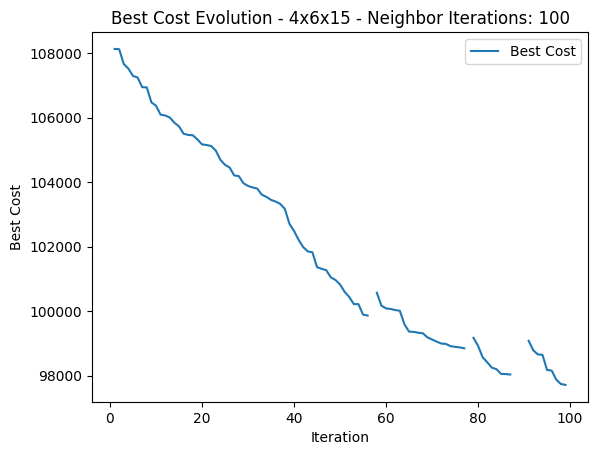

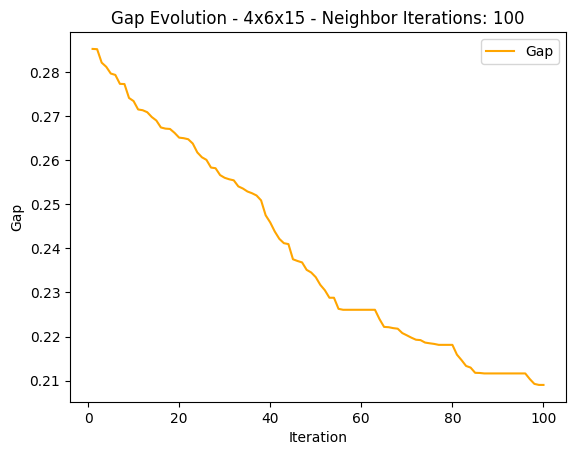

In [106]:
# Plot the graph for Best Cost Evolution
plt.figure()
plt.title(f"Best Cost Evolution - {num_plants}x{num_periods}x{num_products} - Neighbor Iterations: {max_iterations}")
plt.xlabel("Iteration")
plt.ylabel("Best Cost")
plt.plot(x_data, y_data, label="Best Cost")
plt.legend()

# Save the plot as an image file
plt.savefig(f"best_cost_iterations{max_iterations}.png")

# Show the plot
plt.show()

# Plot the graph for Gap Evolution
plt.figure()
plt.title(f"Gap Evolution - {num_plants}x{num_periods}x{num_products} - Neighbor Iterations: {max_iterations}")
plt.xlabel("Iteration")
plt.ylabel("Gap")
plt.plot(x_data, gaps, label="Gap", color='orange')
plt.legend()

# Save the plot as an image file
plt.savefig(f"gap_evolution{max_iterations}.png")

# Show the plot
plt.show()

In [105]:
np.average(gaps)

0.23917664581082249